In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
y=df['Type'].values
X=df.drop(['Type'],axis=1).values

In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=10)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [7]:
knn.score(X_train,y_train)

0.7919463087248322

In [8]:
knn.score(X_test,y_test)

0.47692307692307695

In [9]:
preds = knn.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts()

2    24
1    20
7     7
3     6
6     5
5     3
dtype: int64

Classification report:
Accuracy:  0.47692307692307695
              precision    recall  f1-score   support

           1       0.65      0.52      0.58        25
           2       0.42      0.59      0.49        17
           3       0.17      0.14      0.15         7
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         4
           7       0.71      0.62      0.67         8

    accuracy                           0.48        65
   macro avg       0.44      0.40      0.41        65
weighted avg       0.51      0.48      0.48        65

Confusion matrix:
[[13  9  3  0  0  0]
 [ 2 10  1  1  3  0]
 [ 5  1  1  0  0  0]
 [ 0  0  0  2  1  1]
 [ 0  3  0  0  0  1]
 [ 0  1  1  0  1  5]]


<AxesSubplot:>

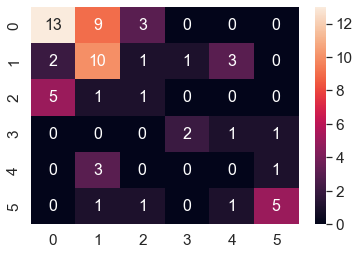

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy = accuracy_score(y_test,preds)
report = classification_report(y_test,preds)
cm = confusion_matrix(y_test,preds)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)
#visualizing the confusion matrix
df_cm = pd.DataFrame(cm, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

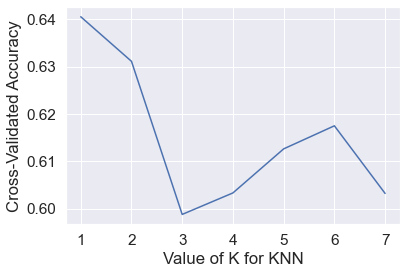

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 8
k_range = range(1, 8)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()